In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dataset = 'cifar10'
model = 'resnet50'
loss = 'dual_focal_loss_gra'
save_loc = "/home/jinxulin/UQ/model/" + dataset + '-' + model + '-' + loss + "/epoch/"

all_bin_stats = []

# 循环读取文件并追加到列表
for i in range(50, 400, 50):  # 注意：结束值应设置为400以包含350
    save_name = str(i) + '_bin_stats.npy'
    loaded_bin_stats = np.load(save_loc + save_name)
    print(loaded_bin_stats.sum())
    all_bin_stats.append(loaded_bin_stats)

# 将列表中的数组堆叠成一个新的 NumPy 数组
combined_bin_stats = np.stack(all_bin_stats, axis=0)


10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


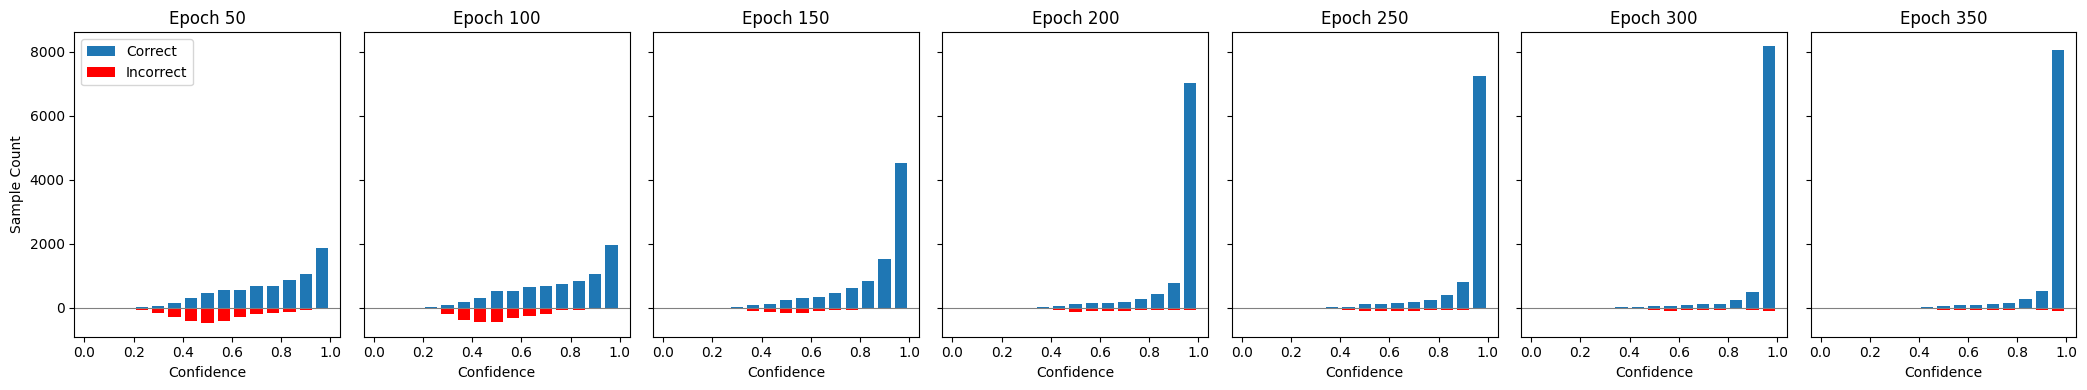

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 combined_bin_stats 是您之前创建的数组，形状为 (7, n_bins, 2)
epochs = [50, 100, 150, 200, 250, 300, 350]
n_bins = combined_bin_stats.shape[1]  # 获取 bin 的数量
confidence_levels = np.linspace(0, 1, n_bins + 1)[:-1] + 0.5 / n_bins  # 中心置信度水平

# 创建一个画布和多个子图
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(21, 4), sharey=True)  # 共享 Y 轴

# 绘制每个 epoch 的数据
for ax, epoch_stats, epoch in zip(axes, combined_bin_stats, epochs):
    correct_counts = epoch_stats[:, 0]
    incorrect_counts = -epoch_stats[:, 1]  # 用负值表示错误分类的数量

    ax.bar(confidence_levels, correct_counts, width=0.05, label='Correct')
    ax.bar(confidence_levels, incorrect_counts, width=0.05, label='Incorrect', color='red')
    
    ax.set_title(f'Epoch {epoch}')
    ax.set_xlabel('Confidence')
    if ax is axes[0]:  # 只在第一个子图上添加 Y 轴标签
        ax.set_ylabel('Sample Count')
    ax.axhline(0, color='gray', linewidth=0.8)  # 添加 Y=0 的参考线

# 添加图例
axes[0].legend(loc='upper left')

# 调整子图之间的间隔
plt.tight_layout()

# 显示图表
plt.show()

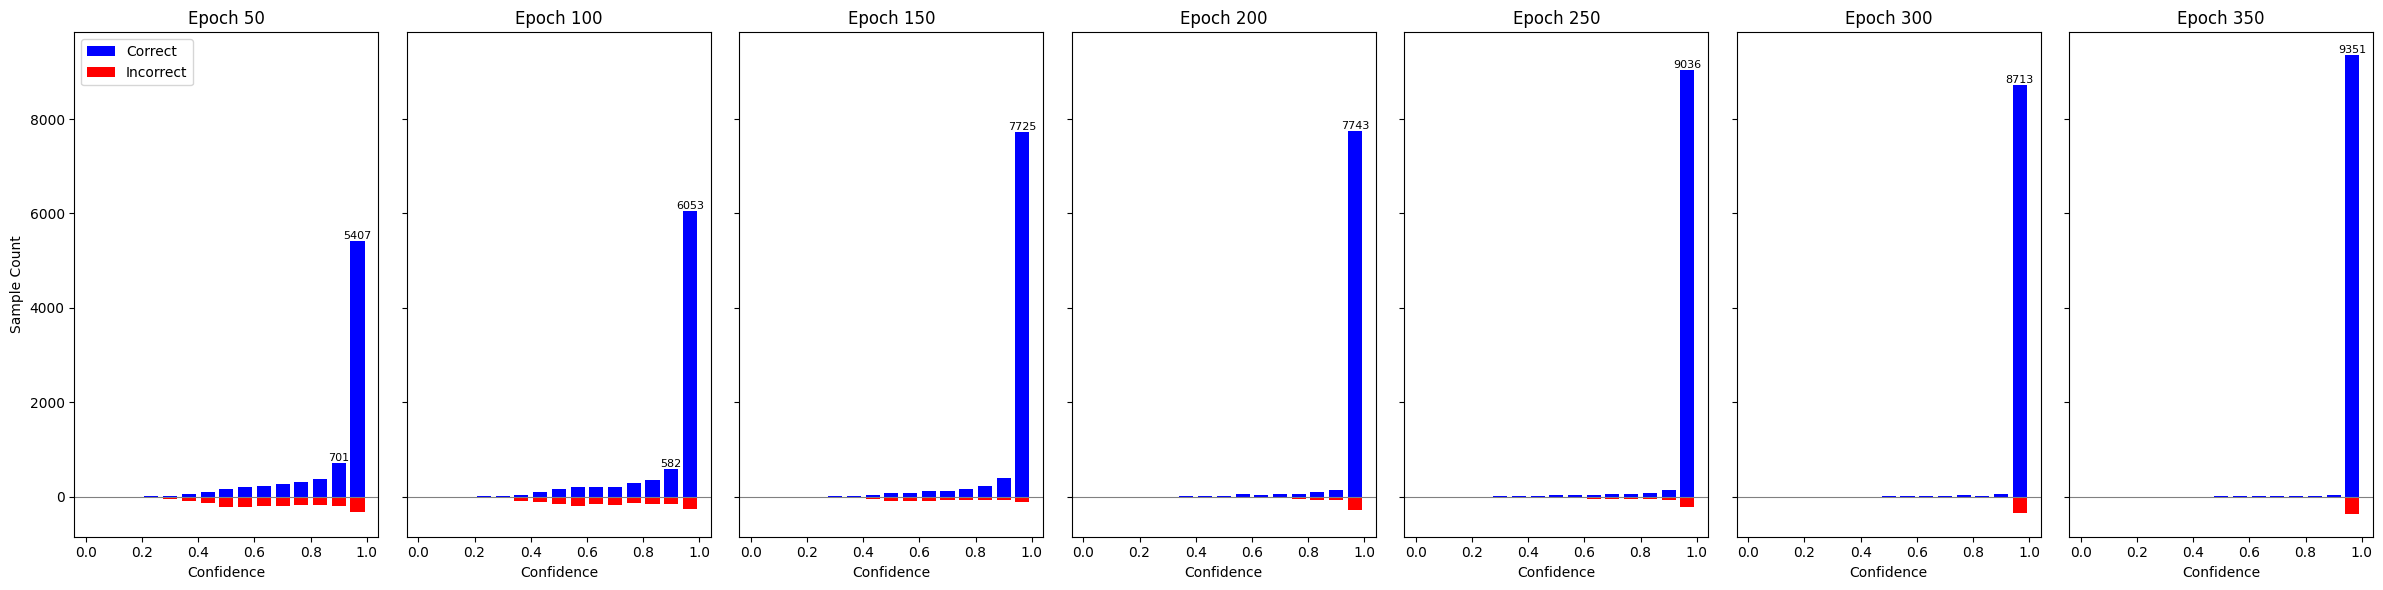

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 combined_bin_stats 是您之前创建的数组，形状为 (7, n_bins, 2)
epochs = [50, 100, 150, 200, 250, 300, 350]
n_bins = combined_bin_stats.shape[1]
confidence_levels = np.linspace(0, 1, n_bins + 1)[:-1] + 0.5 / n_bins

# 创建一个画布和多个子图
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(24, 6), sharey=True)  # 调整图的整体大小

# 绘制每个 epoch 的数据
for ax, epoch_stats, epoch in zip(axes, combined_bin_stats, epochs):
    correct_counts = epoch_stats[:, 0]
    incorrect_counts = -epoch_stats[:, 1]  # 使用负值表示错误分类的数量

    # 绘制正确的样本柱状图
    rects1 = ax.bar(confidence_levels, correct_counts, width=0.05, label='Correct', color='blue')
    # 绘制错误的样本柱状图
    rects2 = ax.bar(confidence_levels, incorrect_counts, width=0.05, label='Incorrect', color='red')
    
    # 在柱状图上添加文本，只有数量较大时显示
    for rect in rects1:
        height = rect.get_height()
        if height > 500:  # 仅当柱子高于500时显示数字
            ax.text(rect.get_x() + rect.get_width() / 2., height,
                    '%d' % int(height),
                    ha='center', va='bottom', fontsize=8)  # 调整字体大小

    for rect in rects2:
        height = rect.get_height()
        if height < -500:  # 仅当柱子低于-500时显示数字
            ax.text(rect.get_x() + rect.get_width() / 2., height,
                    '%d' % int(-height),
                    ha='center', va='top', fontsize=8)  # 调整字体大小

    ax.set_title(f'Epoch {epoch}')
    ax.set_xlabel('Confidence')
    if ax is axes[0]:
        ax.set_ylabel('Sample Count')
    ax.axhline(0, color='gray', linewidth=0.8)

# 添加图例
axes[0].legend(loc='upper left')

# 调整子图之间的间隔
plt.tight_layout()

# 显示图表
plt.show()



In [23]:
print(combined_bin_stats[0].sum())

9863.0
